# CICERO SCM notebook example - interactive input

Import some stuff

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import warnings

Import the model

In [2]:
sys.path.insert(0,os.path.join(os.getcwd(), '../', 'src'))
from ciceroscm import CICEROSCM

Define some input handling functions to give us example inputs

In [3]:
from ciceroscm.input_handler import read_inputfile,read_components,read_natural_emissions
from ciceroscm.pub_utils import make_regional_aerosol_gaspamdata

Define a function to convert model output to a dataframe

In [4]:
def to_df(cscm):
    out=pd.concat([pd.DataFrame(v) for k, v in cscm.results.items()], axis = 1, keys = list(cscm.results.keys()))
    return out

set up input directories

In [5]:
test_data_dir = os.path.join(os.getcwd(), '../', 'tests', 'test-data')

# Read in datafiles into dataframes

In [6]:
# NBVAL_IGNORE_OUTPUT
#Read gas parameters and make a regional aerosol gas pamdata version
df_gas =read_components(test_data_dir + '/gases_vupdate_2022_AR6.txt')
reg_aerosol_RF_file = os.path.join(test_data_dir, "HTAP_reg_aerosol_RF.txt")
reg_aerosol_df = pd.read_csv(reg_aerosol_RF_file, sep="\t", index_col=0)
reg_aerosol_df.rename(columns={"sulfate": "SO2"}, inplace=True)
# Change sign of all values in the dataframe
reg_aerosol_df *= -1
#reg_aerosol_df.values = - reg_aerosol_df.values  # Convert from W/m2 to W/m2 per Tg
#sys.exit(4)
df_gas_updated = make_regional_aerosol_gaspamdata(df_gas, reg_aerosol_df)

df_gas_updated.tail()

,EM_UNIT,CONC_UNIT,BETA,ALPHA,TAU1,TAU2,TAU3,NAT_EM,SARF_TO_ERF
GAS,,,,,,,,,
SO2_ASIA,Tg_SO2,-,0.0,-0.00264,0.0,0,0,0.0,1.0
SO2_LAM,Tg_SO2,-,0.0,-0.00386,0.0,0,0,0.0,1.0
SO2_MAF,Tg_SO2,-,0.0,-0.00458,0.0,0,0,0.0,1.0
SO2_OECD,Tg_SO2,-,0.0,-0.00303,0.0,0,0,0.0,1.0
SO2_REF,Tg_SO2,-,0.0,-0.00242,0.0,0,0,0.0,1.0


Read natural emissions

In [7]:
# NBVAL_IGNORE_OUTPUT
df_nat_ch4 =read_natural_emissions(test_data_dir + '/natemis_ch4.txt','CH4')
df_nat_n2o =read_natural_emissions(test_data_dir + '/natemis_n2o.txt','N2O')
df_nat_ch4.head()

,CH4
year,
1750,269.4273
1751,270.9068
1752,273.0183
1753,272.0470
1754,271.1915


Read forcing

In [8]:
df_ssp2_conc =read_inputfile(test_data_dir + '/ssp245_conc_RCMIP.txt')
df_ssp2_conc.head()

,CO2,CH4,N2O,CFC-11,CFC-12,CFC-113,CFC-114,CFC-115,CH3Br,CCl4,...,HFC143a,HFC227ea,HFC23,HFC245fa,HFC32,HFC4310mee,C2F6,C6F14,CF4,SF6
Component,,,,,,,,,,,,,,,,,,,,,
1700,276.746000,706.054021,272.212049,0.0,0.0,0.0,0.0,0.0,5.299998,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.049999,0.0
1701,276.749995,706.247004,272.243047,0.0,0.0,0.0,0.0,0.0,5.299998,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.049999,0.0
1702,276.757998,706.375031,272.266047,0.0,0.0,0.0,0.0,0.0,5.299998,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.049999,0.0
1703,276.757001,706.491002,272.298047,0.0,0.0,0.0,0.0,0.0,5.299998,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.049999,0.0
1704,276.755000,706.602046,272.331052,0.0,0.0,0.0,0.0,0.0,5.299998,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.049999,0.0


In [9]:
emi_input =read_inputfile(test_data_dir + '/ssp245_with_regional_aerosols_em_RCMIP.txt')
emi_input.rename(columns={"CO2": "CO2_FF", "CO2.1": "CO2_AFOLU"}, inplace=True)
emi_input.head()
emi_input_vanilla =read_inputfile(test_data_dir + '/ssp245_em_RCMIP.txt')
emi_input_vanilla.rename(columns={"CO2": "CO2_FF", "CO2.1": "CO2_AFOLU"}, inplace=True)
emi_input_vanilla.head()

,CO2_FF,CO2_AFOLU,CH4,N2O,SO2,CFC-11,CFC-12,CFC-113,CFC-114,CFC-115,...,CF4,SF6,NOx,CO,NMVOC,NH3,BMB_AEROS_BC,BMB_AEROS_OC,BC,OC
Component,,,,,,,,,,,,,,,,,,,,,
1750,0.002592,0.081127,19.019783,0.054710,2.440048,0.0,0.0,0.0,0.0,0.0,...,0.010071,0.0,3.871504,348.527359,60.021826,6.927690,1.353250,12.520269,0.744520,2.927399
1751,0.002593,0.082619,18.915109,0.055744,2.408379,0.0,0.0,0.0,0.0,0.0,...,0.010071,0.0,3.828060,343.926367,59.088126,6.860142,1.335274,12.279280,0.737652,2.909437
1752,0.002594,0.084139,18.889712,0.056797,2.397116,0.0,0.0,0.0,0.0,0.0,...,0.010071,0.0,3.828658,341.809034,58.631997,6.819482,1.326617,12.121816,0.737695,2.912659
1753,0.002594,0.085687,19.121377,0.057870,2.410693,0.0,0.0,0.0,0.0,0.0,...,0.010071,0.0,3.812105,343.675456,59.026349,6.881439,1.328560,12.249330,0.743391,2.933215
1754,0.002595,0.087263,19.509061,0.058963,2.462065,0.0,0.0,0.0,0.0,0.0,...,0.010071,0.0,3.841598,349.815625,60.269945,7.015189,1.346553,12.593635,0.752796,2.965138


# Set up model run with defined input variables

In [10]:
# NBVAL_IGNORE_OUTPUT
scen = 'test'
cscm_dir=CICEROSCM({
            "gaspam_data": df_gas_updated,
            "emstart": 1751,  
            "conc_run":False,
            "nystart": 1750,
            "nyend": 2100,
            "concentrations_data": df_ssp2_conc,
            "emissions_data": emi_input,
            "nat_ch4_data": df_nat_ch4,
            "nat_n2o_data": df_nat_n2o,
            "idtm":24,
        })

scen = 'test'
cscm_dir_vanilla=CICEROSCM({
            "gaspam_data": df_gas,
            "emstart": 1751,  
            "conc_run":False,
            "nystart": 1750,
            "nyend": 2100,
            "concentrations_data": df_ssp2_conc,
            "emissions_data": emi_input_vanilla,
            "nat_ch4_data": df_nat_ch4,
            "nat_n2o_data": df_nat_n2o,
            "idtm":24,
        })

and run it!

## Parameter Organization

The model parameters are organized into different categories:

- **pamset_udm**: Physical oceanographic parameters (upwelling-diffusion model)
- **pamset_emiconc**: Emissions and concentrations parameters, including forcing coefficients
- **pamset_carbon**: Carbon cycle specific parameters

### Carbon Cycle Parameters

Carbon cycle parameters should be passed in `pamset_carbon`. This includes:

- Physical parameters: `beta_f`, `mixed_carbon`, `npp0`, `ml_w_sigmoid`, `ml_fracmax`, `ml_t_half`, etc.
- Function parameters: Can use either dictionary or flat format

### Using Flat Carbon Cycle Parameters

The carbon cycle function parameters can now be specified using "flat" parameter names instead of requiring dictionary structures. For example, instead of:

```python
rb_function = {"coeffs": [0.5, 0.25, 0.25], "timescales": [2.5, 10.0, 60.0]}
```

You can now use:

```python
'rb_coef0': 0.5, 'rb_coef1': 0.25, 'rb_coef2': 0.25,
'rb_tim0': 2.5, 'rb_tim1': 10.0, 'rb_tim2': 60.0
```

In [11]:
# NBVAL_IGNORE_OUTPUT
cscm_dir._run({"results_as_dict":True})   

cscm_dir_vanilla._run({"results_as_dict":True,})   

emstart can not be changed for same instance of ConcentrationsEmisssionsHandler. Resetting with old value 1751. If you want to run with a different value, please create a separate instance


emstart can not be changed for same instance of ConcentrationsEmisssionsHandler. Resetting with old value 1751. If you want to run with a different value, please create a separate instance


Convert the output to a dataframe for easy handling

In [12]:

df_temp = to_df(cscm_dir)
df_temp_vanilla = to_df(cscm_dir_vanilla)

# Plot output

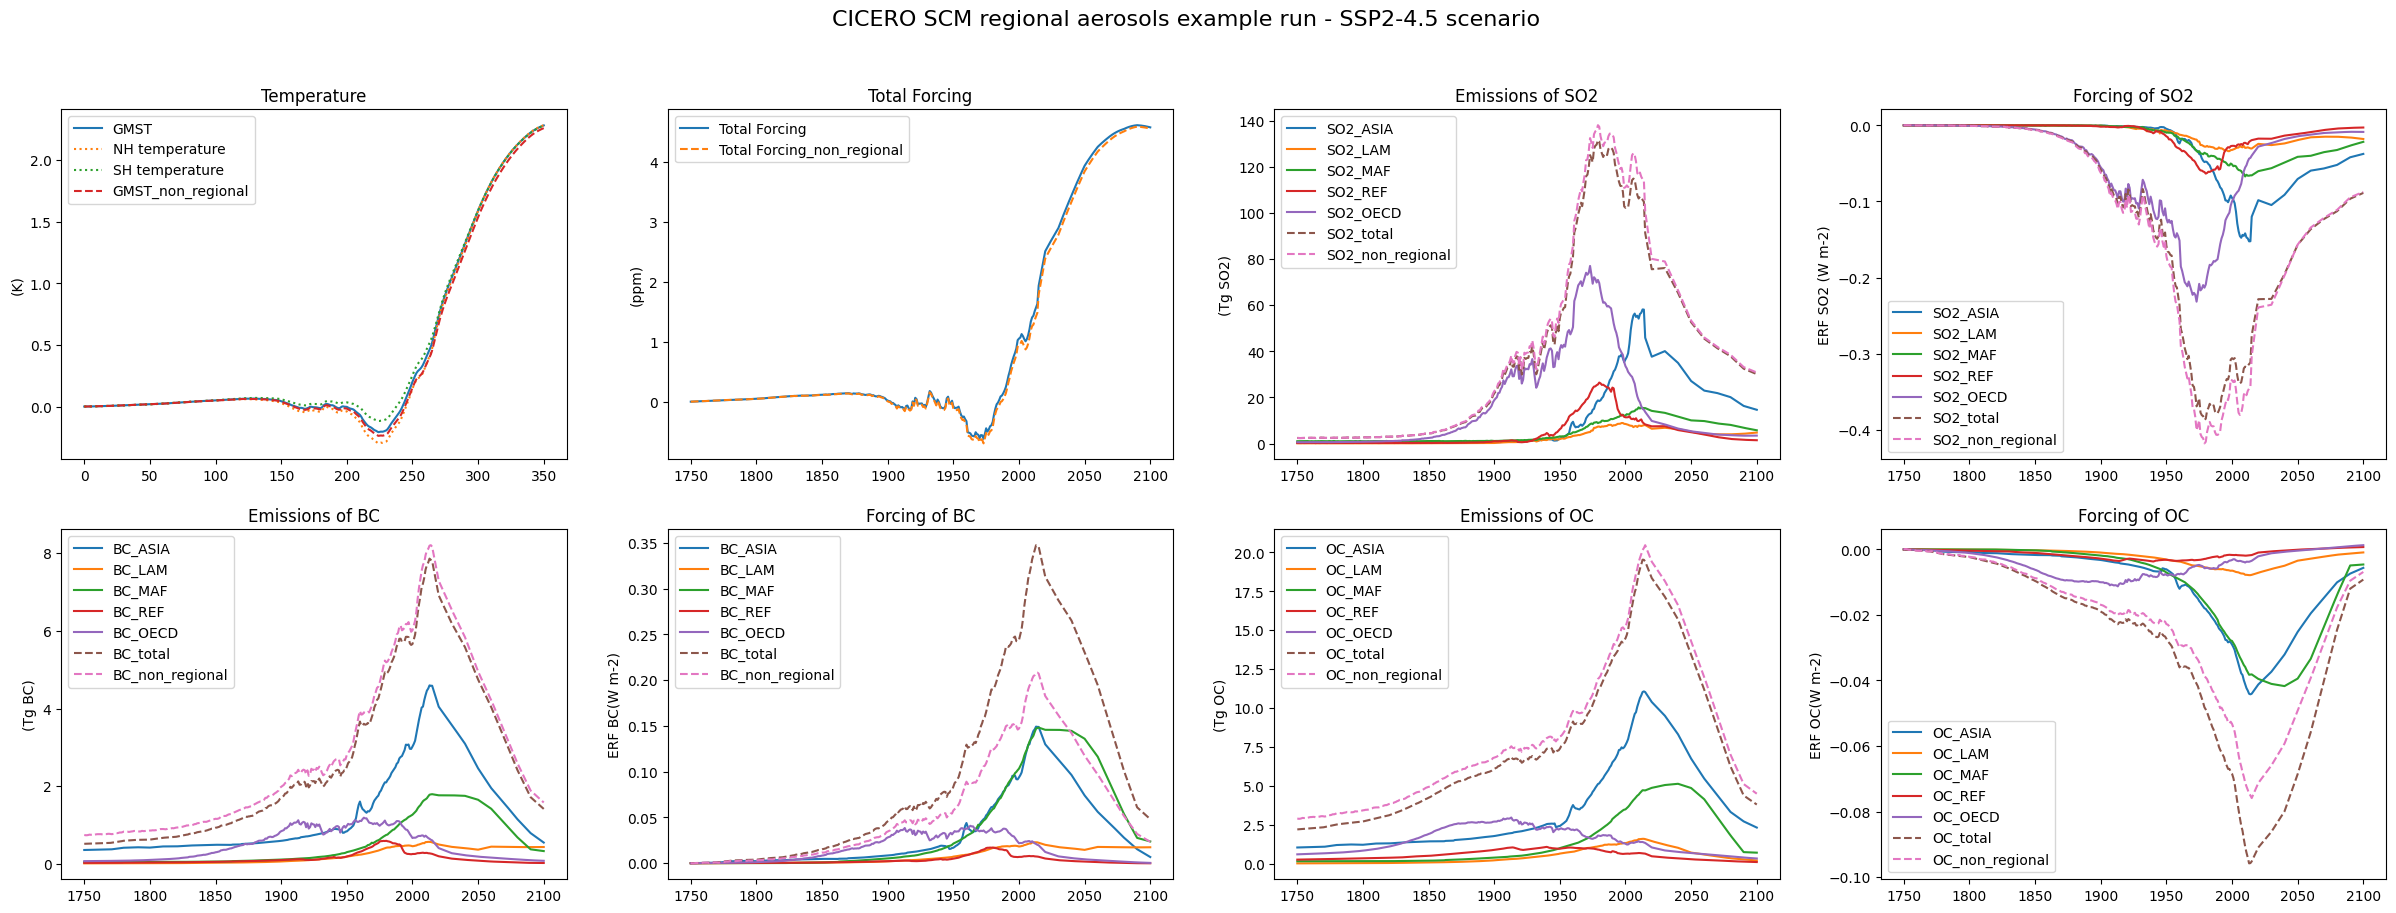

In [13]:
# NBVAL_IGNORE_OUTPUT
fig, axs = plt.subplots(nrows=2, ncols=4,figsize=(30,10))
axs=axs.flatten()
fig.suptitle('CICERO SCM regional aerosols example run - SSP2-4.5 scenario', fontsize=16)

df_temp['dT_glob'].plot(ylabel='(K)',ax=axs[0])
df_temp['dT_NH'].plot(ylabel='(K)',ax=axs[0],linestyle=':')
df_temp['dT_SH'].plot(ylabel='(K)',ax=axs[0],linestyle=':')
df_temp_vanilla['dT_glob'].plot(ylabel='(K)',ax=axs[0],linestyle='--')
axs[0].legend(['GMST','NH temperature','SH temperature', 'GMST_non_regional'])
axs[0].set_title('Temperature')

df_temp['forcing']['Total_forcing'].plot(ylabel='(ppm)',ax=axs[1])
df_temp_vanilla['forcing']['Total_forcing'].plot(ylabel='(ppm)',ax=axs[1], linestyle='--')
axs[1].legend([r'Total Forcing', r'Total Forcing_non_regional'])
axs[1].set_title('Total Forcing')

aerosols = ["SO2", "BC", "OC"]
regions = ["ASIA", "LAM", "MAF", "REF", "OECD"]
for aer_num, aerosol in enumerate(aerosols):
    em_sum = pd.Series(0, index=df_temp.index)
    forc_sum = pd.Series(0, index=df_temp.index)
    for region in regions:
        df_temp["emissions"][f"{aerosol}_{region}"].plot(
            ylabel=f'(Tg {aerosol})',
            ax=axs[2 + aer_num*2]
            )
        df_temp["forcing"][f"{aerosol}_{region}"].plot(
            ylabel='(W m-2)',
            ax=axs[3 + aer_num*2]
            )
        em_sum += df_temp["emissions"][f"{aerosol}_{region}"]
        forc_sum += df_temp["forcing"][f"{aerosol}_{region}"]
    # Also plot the non-regional aerosol emissions and forcing
    em_sum.plot(
        ylabel=f'(Tg {aerosol})',
        ax=axs[2 + aer_num*2],
        linestyle='--'
        )
    forc_sum.plot(
        ylabel=f'ERF {aerosol} (W m-2)',
        ax=axs[3 + aer_num*2],
        linestyle='--'
        )
    df_temp_vanilla["emissions"][aerosol].plot(
        ylabel=f'(Tg {aerosol})',
        ax=axs[2 + aer_num*2],
        linestyle='--'
        )
    if aerosol == "SO2":
        df_temp_vanilla["forcing"]["SO4_DIR"].plot(
            ylabel=f'ERF {aerosol} (W m-2)',
            ax=axs[3 + aer_num*2],
            linestyle='--'
            )
    else:
        df_temp_vanilla["forcing"][aerosol].plot(
            ylabel=f'ERF {aerosol}(W m-2)',
            ax=axs[3 + aer_num*2],
            linestyle='--'
            )  
    legend_em =  [f'{aerosol}_{region}' for region in regions]
    legend_em.append(f"{aerosol}_total")
    legend_em.append(f'{aerosol}_non_regional')            
    axs[2 + aer_num*2].legend(legend_em)
    axs[2 + aer_num*2].set_title(f'Emissions of {aerosol}')
    axs[3 + aer_num*2].set_title(f'Forcing of {aerosol}')
    axs[3 + aer_num*2].legend(legend_em)
plt.show()